In [1]:
# pip install dask

In [2]:
# pip install distributed

In [3]:
import random
import dask
from dask.distributed import Client

In [4]:
client = Client() # open a dask cluster with scheduler and workers

In [5]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:64398,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:64411,Total threads: 2
Dashboard: http://127.0.0.1:64412/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:64401,


In [6]:
# for a num add a random value between 0.0 and 1.0
def compute_sigma(s):
    return s + random.random()

# generate a random value in random distribution of mean of (100 + mu) and standard error of (50 + sigma)
def simulate(mu, sigma):
    rv = 100 + 50 * random.normalvariate(mu, sigma)
    return rv

In [7]:
# set simulation number = 5,000
N = 5000
results = []

# delayed to simulate a list of results including N number of values in mean of [0, N] and a random sigma (within [1, 2]) as standard error.
for i in range(N):
    sigma = dask.delayed(compute_sigma)(1) # [1,2) ~ 1.5
    results.append(dask.delayed(simulate)(i, sigma)) # [100+50*([0, 5000), [1,2)] ~ mu = 100 + 50 * i = 100 + 50 * ((0+4999)* 5000/2)/5000 = 125,075

# delayed to compute the average of the results
avg = dask.delayed(sum)(results) / dask.delayed(len)(results)

print(avg.compute())

125074.18336029608


In [12]:
# pip install graphviz

159.66259295625866


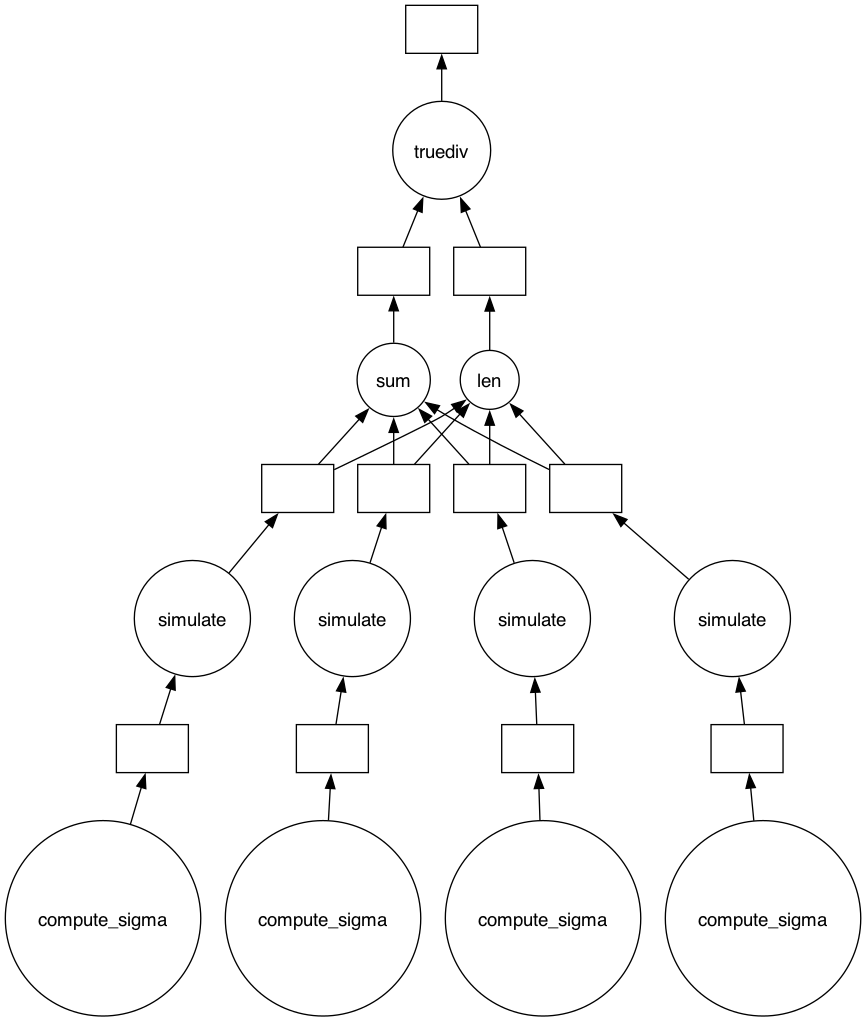

In [13]:
# set simulation number = 4
N = 4
results = []

# delayed to simulate a list of results including N number of values in mean of [0, N] and a random sigma (within [1, 2]) as standard error.
for i in range(N):
    sigma = dask.delayed(compute_sigma)(1) # [1,2) ~ 1.5
    results.append(dask.delayed(simulate)(i, sigma)) # [100+50*([0, 4), [1,2)] ~ mu = 100 + 50 * i = 100 + 50 * ((0+3)* 4/2)/4 = 175

# delayed to compute the average of the results
avg = dask.delayed(sum)(results) / dask.delayed(len)(results)

print(avg.compute())
avg.visualize()